# 求数据的前n个主成分

n维度的数据有n个主成分。当求出第一主成分后，将数据再第一主成分的相应的分量去掉

假设点原来的坐标为$X^{(i)} = (X_1^{(i)}, X_2^{(i)})$, 映射到$w$后的坐标为$(X_{pr1}^{(i)}, X_{pr2}^{(i)})$,前面推导出公式

$X^{(i)}\cdot w = ||X_{project}^{(i)}||$，即$X_{project}^{(i)}$的模为$X^{(i)}\cdot w$

$X_{project}^{(i)} = ||X_{project}^{(i)}||\cdot w$

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
X = np.empty((100, 2))
X[:, 0] = np.random.uniform(0., 100., size=100)
X[:, 1] = 0.75 * X[:, 0] + 3. + np.random.normal(0, 10., size=100)

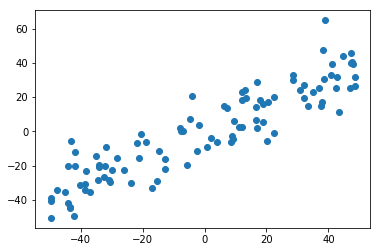

In [21]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [22]:
def demean(X):
    return X - np.mean(X, axis=0)

In [23]:
X = demean(X)

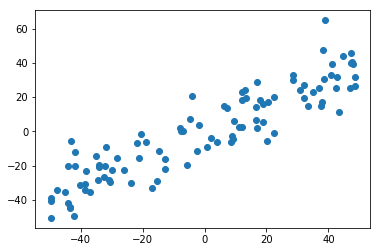

In [24]:
plt.scatter(X[:,0], X[:, 1])
plt.show()

In [25]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

In [28]:
# 梯度上升求第一主成分
def first_component(X, initial_w, eta, n_iters = 1e4, epsilon=1e-8):
    w = direction(initial_w)
    cur_iter = 0
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1
        
    return w

In [29]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X, initial_w, eta)
w

array([ 0.77605014,  0.63067121])

In [30]:
X2 = np.empty(X.shape)
for i in range(len(X)):
    # X[i].dot(w) 将X[i]映射到w方向上的模
    # X[i].dot(w) * w 结果X[i]向量
    X2[i] = X[i] - X[i].dot(w) * w
# 或者 X2 = X - X.dot(w).reshape(-1, 1) * w

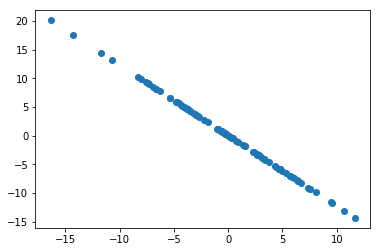

In [31]:
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [38]:
w2 = first_component(X2, initial_w, eta)
w2

array([ 0.63067526, -0.77604685])

In [39]:
w.dot(w2)

5.2109012420586964e-06

In [40]:
# 封装求前n个主成分
def first_n_components(n, X, eta=0.01, n_iters = 1e4, epsilon=1e-8):
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca, initial_w, eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1, 1) * w
        
    return res

In [41]:
first_n_components(2, X)

[array([ 0.77605013,  0.63067122]), array([ 0.63067525, -0.77604686])]